## Exercise 2 - Handwriting recognition
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

In [1]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE

## Answer
### 1. load and split data

In [2]:
data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

### 2. EDA & Preprocessing

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train = X_train/255.
X_test = X_test/255.

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### 3. Train

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0809 - accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

### 4. Evaluate

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9802


[0.09867558628320694, 0.9801999926567078]

In [11]:
pred = model.predict(X_test)

In [12]:
pred[0]

array([5.2880038e-20, 8.8054618e-13, 1.5826797e-12, 7.3981316e-13,
       4.0629634e-15, 1.3586438e-17, 9.5187752e-21, 1.0000000e+00,
       3.2585991e-15, 2.6435627e-12], dtype=float32)

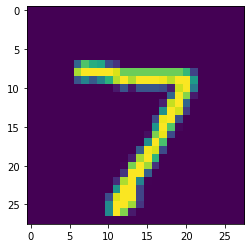

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])

### Bonus : Add callback

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nEnough!")
            self.model.stop_training = True

In [25]:
callbacks = myCallback()

In [26]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model2.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9406
Enough!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2006 - accuracy: 0.9407


Callback 클래스 안에 호출되는 함수 이름은 항상 `on_epoch_end`여야 되는것 같은데?
* 아아 `tf.keras.callbacks.Callback` 클래스의 메소드가 `on_batch_begin`, `on_batch_end`, `on_epoch_begin`, `on_epoch_end` 이런식으로 정해져 있어서 그렇구나
* tf.keras.callbacks.Callback이라는 상위 클래스를 가져다 쓰는 개념!?
* 클래스 공부 다시해야지
* 참고: [tf api ref: tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)